In [1]:
from world_machine_experiments import toy1d, shared
from world_machine_experiments.toy1d import Dimensions
from world_machine_experiments.toy1d import base, multiple, parameter_variation
from world_machine import WorldMachine

from hamilton import driver
from hamilton_sdk import adapters
from torch.optim import Adam, AdamW
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = driver.Builder().with_modules(base, shared).build()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
inputs = {"sequence_lenght": 1000,
                       "n_sequence": 100,
                       "context_size": 200,
                       "state_dimensions": None,
                       "batch_size": 32,
                       "n_epoch": 5,
                       "learning_rate": 5e-3,
                       "weight_decay": 5e-4,
                       "accumulation_steps": 1,
                       "optimizer_class": AdamW,
                       "block_configuration": [Dimensions.NEXT_MEASUREMENT, Dimensions.NEXT_MEASUREMENT],
                       "device": device,
                       "use_state_control": False,
                       "discover_state": True, 
                       "stable_state_epochs": 1,
                       "seed":42,
                       "remove_positional_encoding":True,
                       "use_positional_encoding":False,
                       "output_dir":"test_autoregressive"
                       }

100%|██████████| 250/250 [00:04<00:00, 58.97it/s]


VAL Epoch [0/5],             Loss: 0.1835


100%|██████████| 750/750 [00:16<00:00, 45.99it/s]


Epoch [1/5],             Loss: 0.0059, Elapsed Time: 16.37 sec


100%|██████████| 250/250 [00:04<00:00, 60.65it/s]


VAL Epoch [1/5],             Loss: 0.0003


100%|██████████| 750/750 [00:16<00:00, 46.30it/s]


Epoch [2/5],             Loss: 0.0002, Elapsed Time: 16.26 sec


100%|██████████| 250/250 [00:04<00:00, 60.61it/s]


VAL Epoch [2/5],             Loss: 0.0001


100%|██████████| 750/750 [00:16<00:00, 46.11it/s]


Epoch [3/5],             Loss: 0.0001, Elapsed Time: 16.33 sec


100%|██████████| 250/250 [00:04<00:00, 62.02it/s]


VAL Epoch [3/5],             Loss: 0.0001


100%|██████████| 750/750 [00:17<00:00, 42.97it/s]


Epoch [4/5],             Loss: 0.0001, Elapsed Time: 17.51 sec


100%|██████████| 250/250 [00:04<00:00, 61.13it/s]


VAL Epoch [4/5],             Loss: 0.0001


100%|██████████| 750/750 [00:16<00:00, 46.46it/s]


Epoch [5/5],             Loss: 0.0001, Elapsed Time: 16.20 sec


100%|██████████| 250/250 [00:04<00:00, 59.90it/s]


VAL Epoch [5/5],             Loss: 0.0001


100%|██████████| 250/250 [03:47<00:00,  1.10it/s]

********************************************************************************
> toy1d_autoregressive_state_plots [world_machine_experiments.toy1d.base.autoregressive.toy1d_autoregressive_state_plots()] encountered an error<
> Node inputs:
{'toy1d_autoregressive_states': "{'train': tensor([[[-0.1672, -0.5232,  "
                                '0.2126,  0....',
 'toy1d_dataloaders': "{'train': <torch.utils.data.dataloader.DataLoader ..."}
********************************************************************************
Traceback (most recent call last):
  File "c:\Users\eltsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\hamilton\execution\graph_functions.py", line 302, in execute_lifecycle_for_node
    result = __node_(**__kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eltsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\hamilton\node.py", line 262, in __call__
    return self.callable(*args, **kwarg

AttributeError: 'dict' object has no attribute 'dataset'

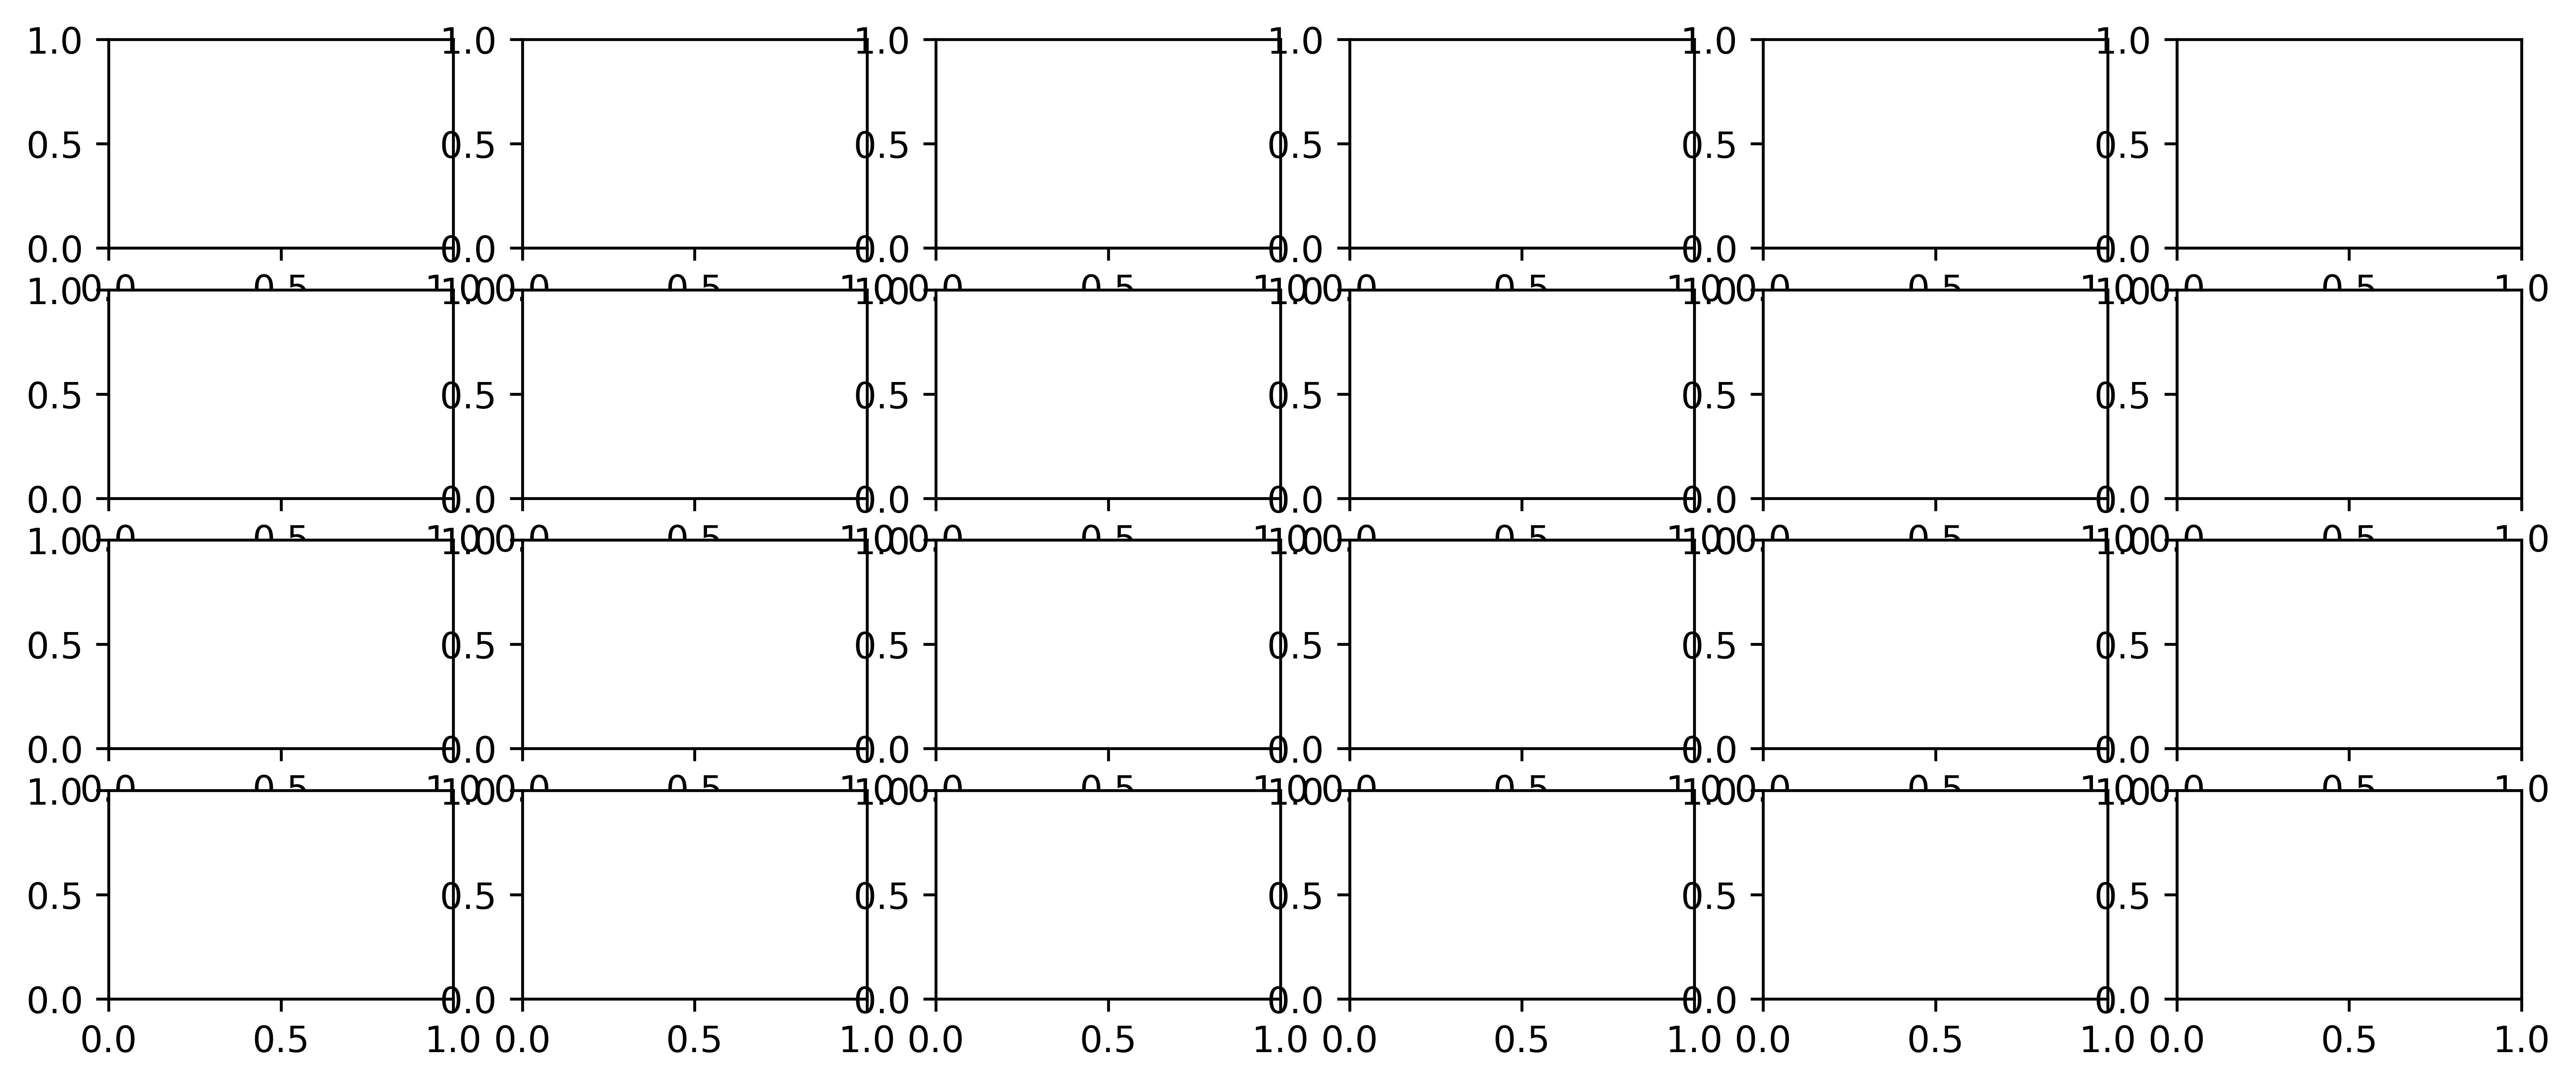

In [4]:
outputs = d.execute(["toy1d_model_training_info", 
                     "toy1d_dataloaders", 
                     "save_toy1d_autoregressive_state_plots", 
                     "save_toy1d_autoregressive_positional_encoder_plots", 
                     "save_toy1d_autoregressive_state_decoded_plots",
                     "save_toy1d_autoregressive_metrics"], inputs=inputs)

In [6]:
dataloaders = outputs["toy1d_dataloaders"]
train_info = outputs["toy1d_model_training_info"]

model = train_info["toy1d_model_trained"]
train_loader = dataloaders["train"]
train_dataset = train_loader.dataset

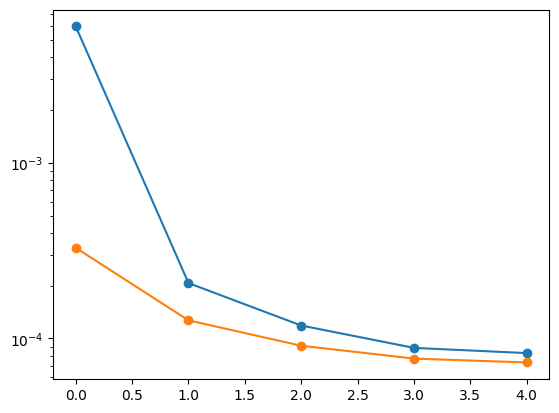

In [7]:
plt.plot(train_info["toy1d_train_history"]["optimizer_loss_train"], "o-")
plt.plot(train_info["toy1d_train_history"]["optimizer_loss_val"], "o-")

plt.yscale("log")
plt.show()

In [8]:
train_dataset[0]["inputs"]["state"].min(), train_dataset[0]["inputs"]["state"].max()

(tensor(-0.9843), tensor(0.9686))

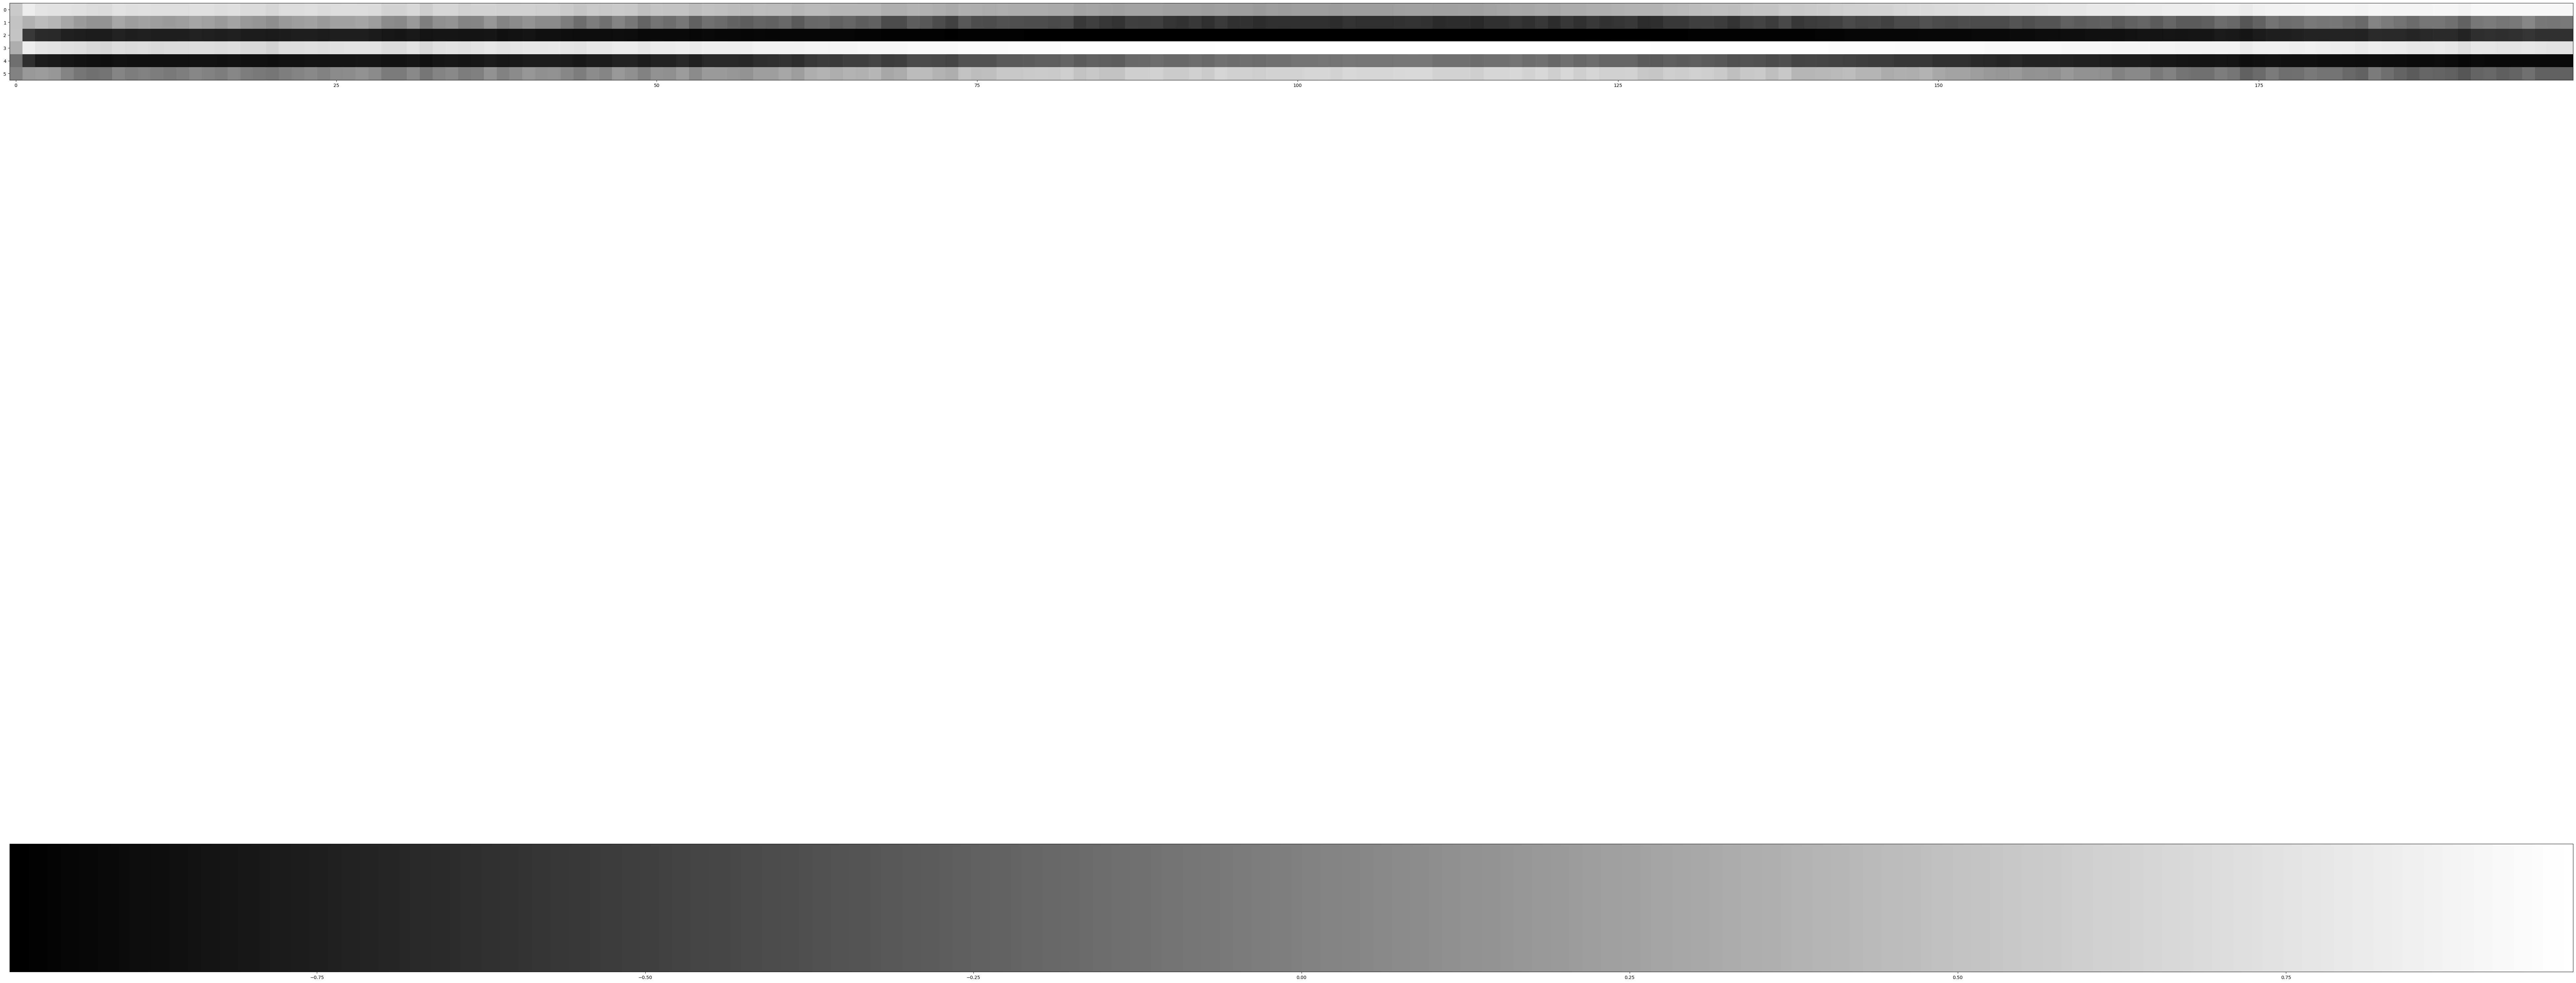

In [9]:

plt.figure(figsize=(100,200))
plt.imshow(train_dataset[0]["inputs"]["state"].T)

plt.gray()

plt.colorbar(orientation='horizontal')

plt.show()

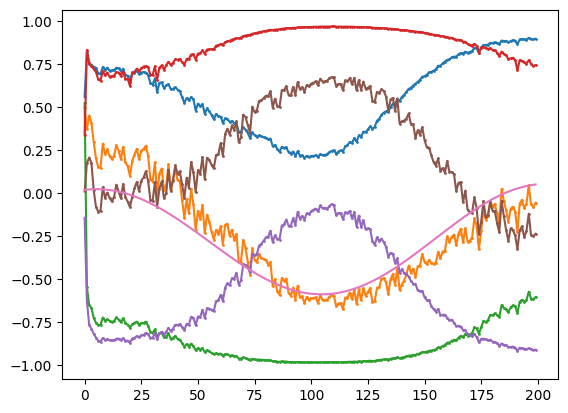

In [10]:
plt.plot(train_dataset[0]["inputs"]["state"], "o-", markersize=1)

plt.plot(train_dataset[0]["targets"]["state_decoded"][:,0])

In [11]:
item = next(iter(train_loader))

In [12]:
item["inputs"]["state"].min(), item["inputs"]["state"].max()

(tensor(-0.9946), tensor(0.9964))

In [13]:

inputs: torch.Tensor = item["inputs"].to(device)
targets: torch.Tensor = item["targets"]["state_decoded"]

state = inputs["state"]
sensorial_masks = None

with torch.no_grad():
    logits_orig = model(state=state, sensorial_data=inputs, sensorial_masks=sensorial_masks)

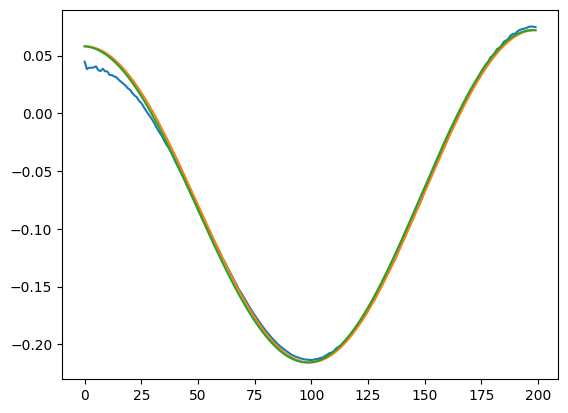

In [14]:
state_decoded = logits_orig["state_decoded"].cpu().numpy()

plt.plot(state_decoded[0 ,:,0])
plt.plot(inputs["state_decoded"][0,:,0].cpu())
plt.plot(targets[0,:,0].cpu())

In [15]:
batch_size = 32
seq_len = 200
state_size = 6

In [16]:



inputs: torch.Tensor = item["inputs"].to(device)
targets: torch.Tensor = item["targets"]["state_decoded"]

state = torch.rand((batch_size, seq_len, state_size), device=device)
state = (2*state)-1

state = torch.normal(
                        0.0, 0.4, (batch_size, seq_len, state_size), device=device)
state = torch.clamp(state, -1, 1)

state = inputs["state"].clone()


model.eval()

sensorial_masks = None
with torch.no_grad():
    for i in range(seq_len):
        logits = model(state=state, sensorial_data=inputs, sensorial_masks=sensorial_masks)


        if i != seq_len-1:
            state[:, i+1] = logits["state"][:, i]

        #state = torch.clamp(state, -1, 1)


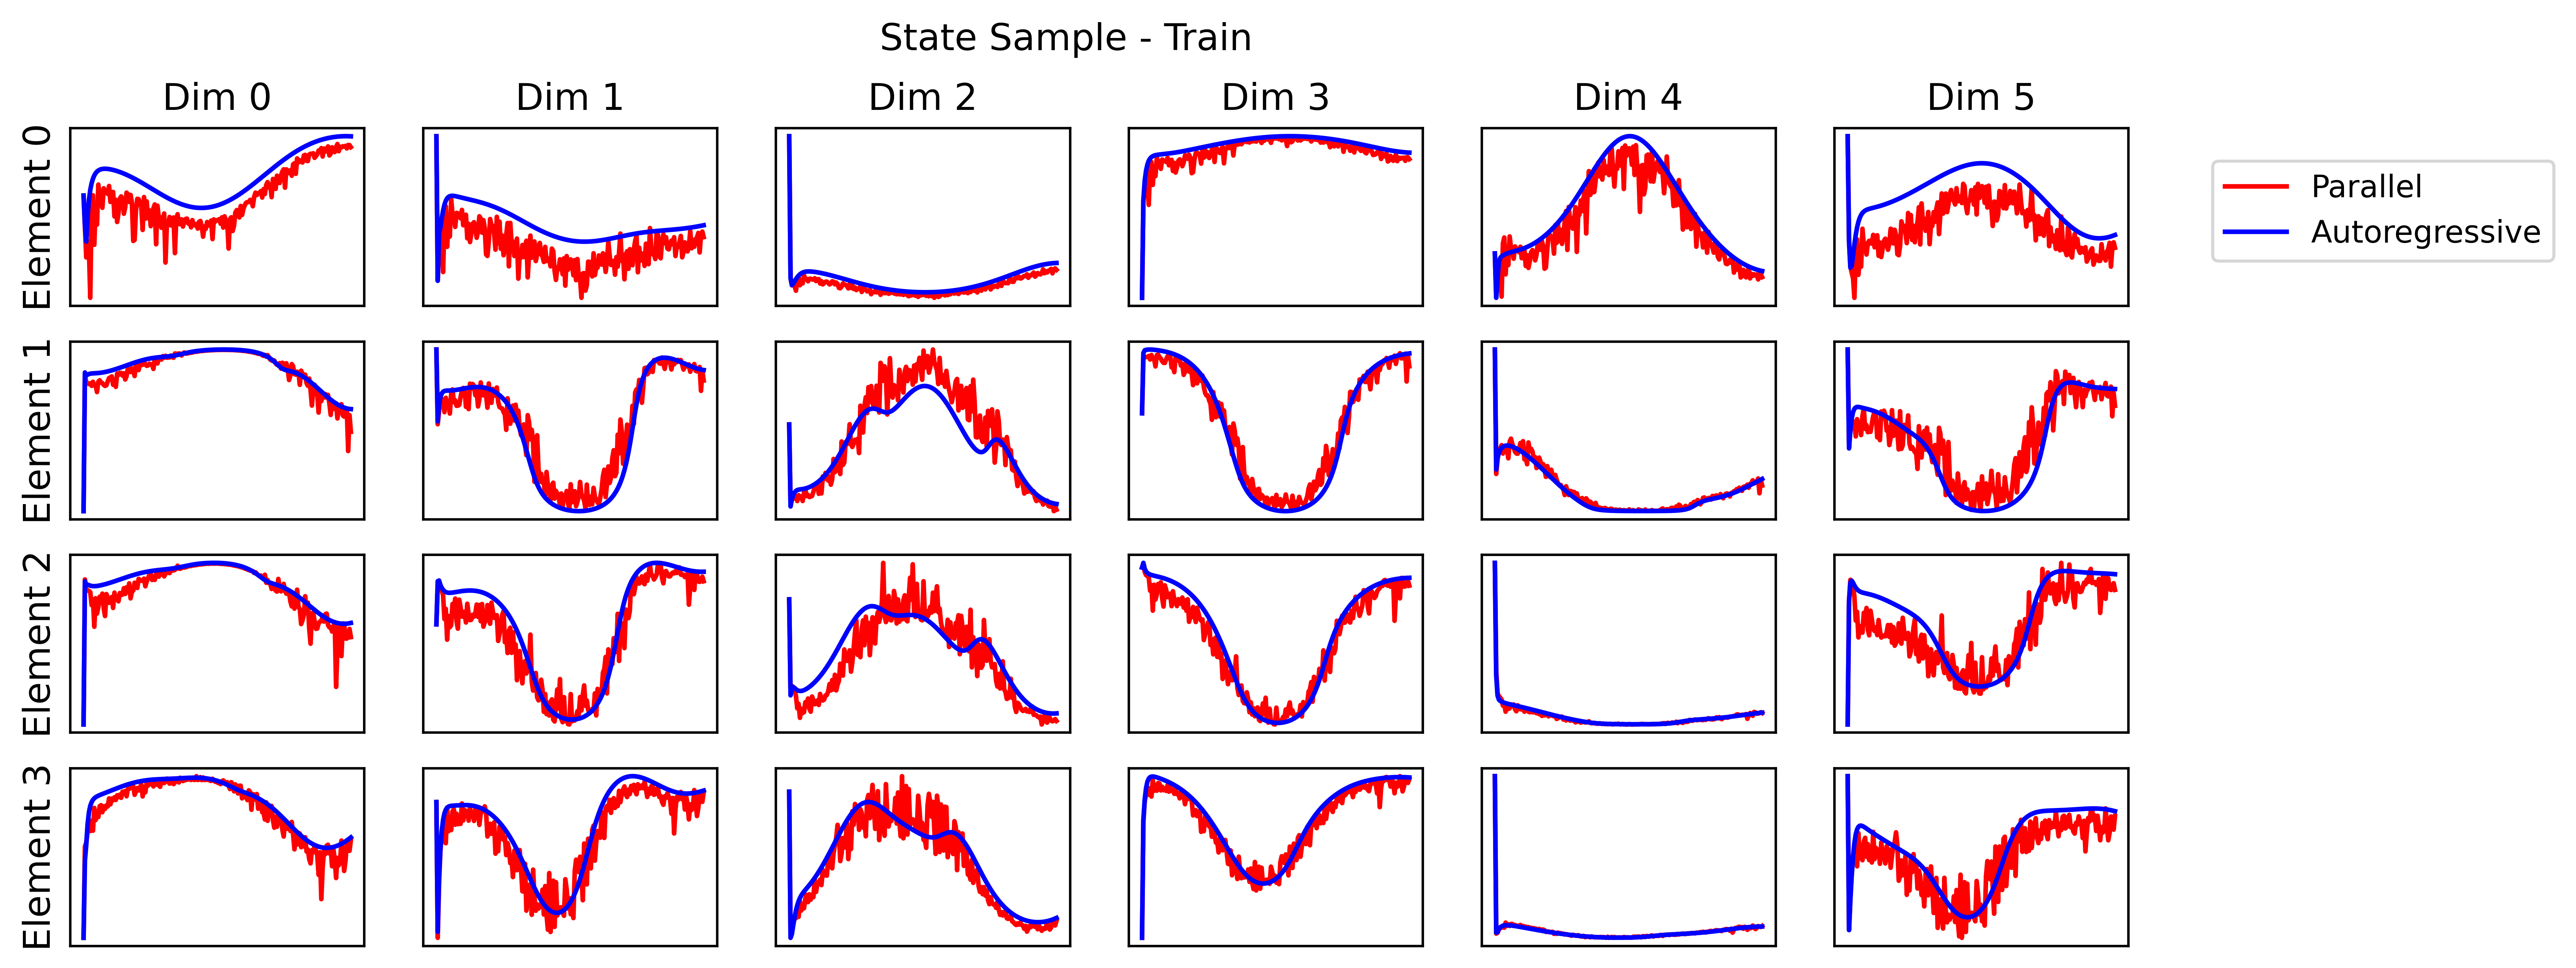

In [17]:
fig, axs = plt.subplots(4, 6, dpi=600, figsize=(12, 4.8))

for i in range(24):
    row = i // 6
    column = i % 6

    axs[row, column].plot(inputs["state"][row, :, column].cpu(), color="red", label="Parallel")
    axs[row, column].plot(state[row, :, column].cpu(), color="blue", label="Autoregressive")
    axs[row, column].set_xticks([])
    axs[row, column].set_yticks([])

for i in range(6):
    axs[0][i].set_title(f"Dim {i}")

for i in range(4):
    axs[i][0].set_ylabel(f"Element {i}", size="large")

plt.suptitle("State Sample - Train")
plt.legend(bbox_to_anchor=(2.5, 4.5), loc='upper right')
plt.show()

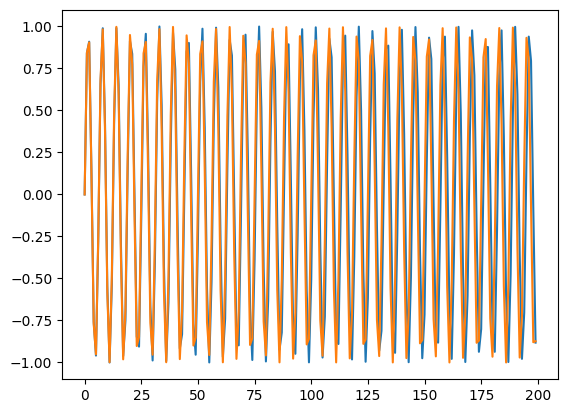

In [18]:
plt.plot(model._positional_encoder()[:,0].cpu())
plt.plot(np.sin(200*np.linspace(0,1, 200)))

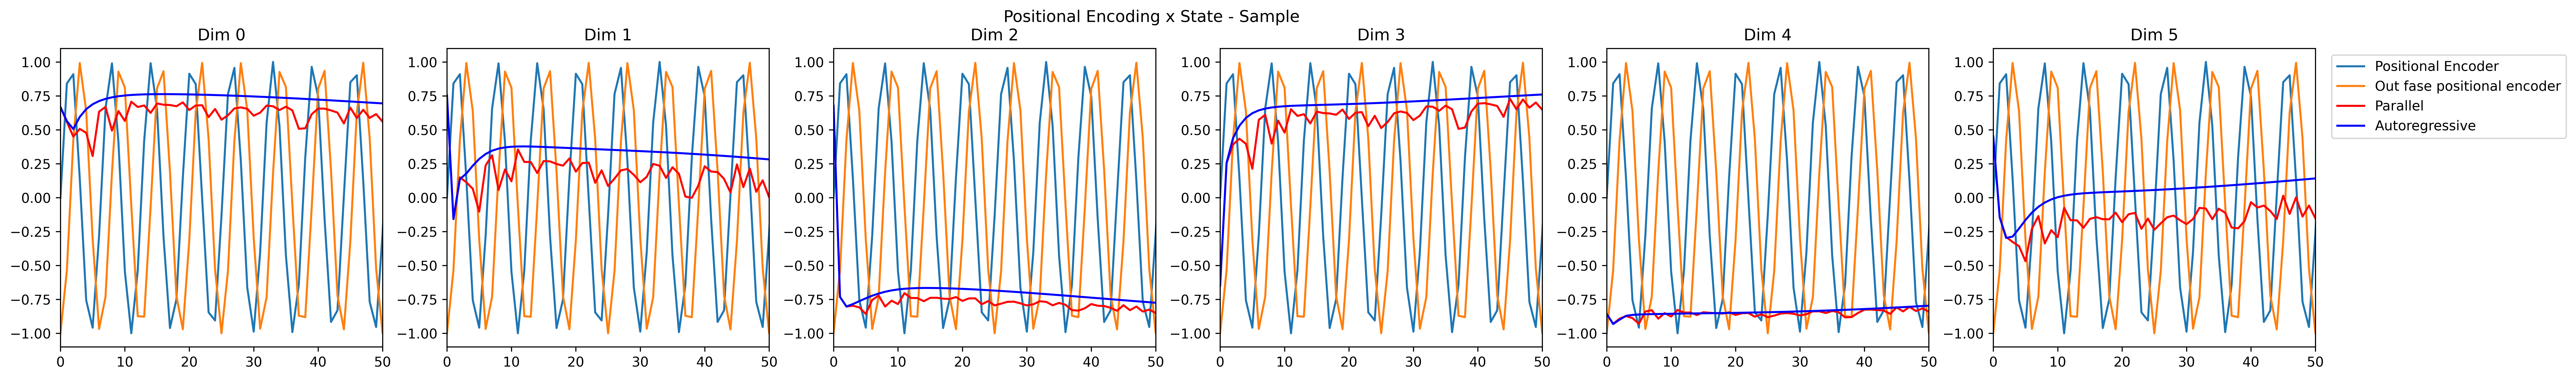

In [19]:
fig, axs = plt.subplots(1, 6, dpi=600, figsize=(30, 4))

for column in range(6):

    axs[column].plot(model._positional_encoder()[:,0].cpu(), label="Positional Encoder")
    axs[column].plot(-np.sin(200*np.linspace(0,1, 200) + (np.pi/2)), label="Out fase positional encoder")

    axs[column].plot(inputs["state"][0, :, column].cpu(), color="red", label="Parallel")
    axs[column].plot(state[0, :, column].cpu(), color="blue", label="Autoregressive")

    axs[column].set_xlim(0, 50)

    axs[column].set_title(f"Dim {column}")


plt.legend(bbox_to_anchor=(1.8, 1.0), loc='upper right')

plt.suptitle("Positional Encoding x State - Sample")

plt.show()

In [20]:
inputs["state"].shape

torch.Size([32, 200, 6])

In [21]:
for i in range(6):
    print(inputs["state"][0, :6, i].cpu(), state[0, :6, i].cpu())

tensor([0.6680, 0.5580, 0.4492, 0.5063, 0.4774, 0.3065]) tensor([0.6680, 0.5640, 0.5054, 0.5949, 0.6521, 0.6882])
tensor([ 0.7527, -0.1565,  0.1495,  0.1129,  0.0651, -0.1032]) tensor([ 0.7527, -0.1583,  0.1360,  0.1773,  0.2347,  0.2849])
tensor([ 0.6771, -0.7318, -0.8036, -0.7970, -0.8094, -0.8575]) tensor([ 0.6771, -0.7325, -0.8026, -0.7849, -0.7635, -0.7424])
tensor([-0.6493,  0.2540,  0.3906,  0.4340,  0.3967,  0.2129]) tensor([-0.6493,  0.2562,  0.4381,  0.5301,  0.5875,  0.6222])
tensor([-0.8570, -0.9305, -0.8924, -0.8737, -0.8883, -0.9301]) tensor([-0.8570, -0.9321, -0.8999, -0.8716, -0.8648, -0.8619])
tensor([ 0.4507, -0.1463, -0.2904, -0.3268, -0.3576, -0.4690]) tensor([ 0.4507, -0.1457, -0.2975, -0.2872, -0.2283, -0.1652])


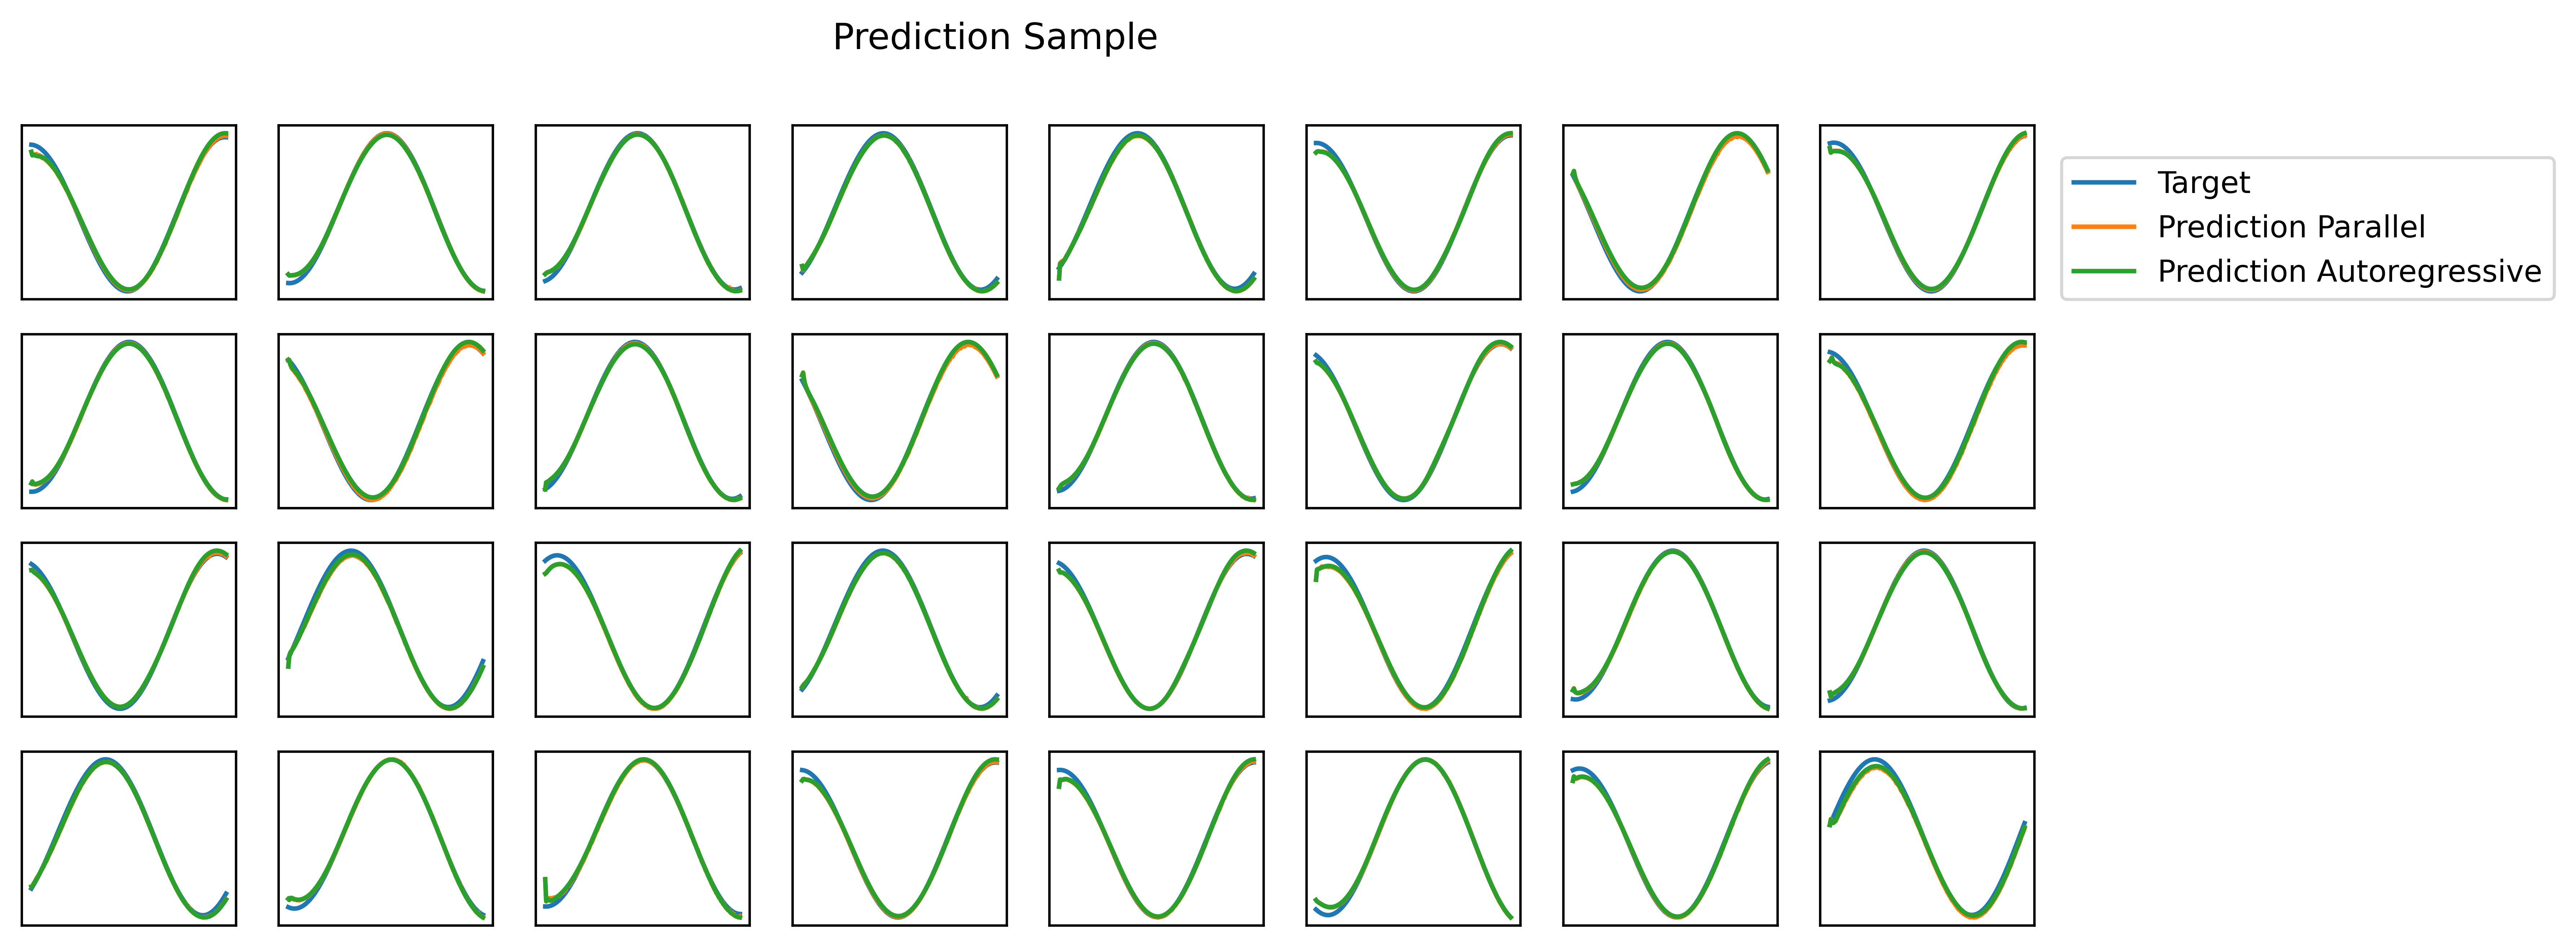

In [ ]:

fig, axs = plt.subplots(4, 8, dpi=600, figsize=(12, 4.8))

for i in range(32):
    row = i // 8
    column = i % 8

    axs[row, column].plot(targets[i,:,0].cpu(), label="Target")
    axs[row, column].plot(logits_orig["state_decoded"][i,:,0].cpu(), label="Prediction Parallel")
    axs[row, column].plot(logits["state_decoded"][i,:,0].cpu(), label="Prediction Autoregressive")

    axs[row, column].set_xticks([])
    axs[row, column].set_yticks([])

plt.suptitle("Prediction Sample - Parallel x Autoregressive")
plt.legend(bbox_to_anchor=(3.5, 4.5), loc='upper right')

plt.show()

In [ ]:
state_next = logits["state"]
state_current = torch.roll(state_next, 1, 1)
state_current[:, 0] = state[:, 0]

logits["state"][0], state_current[0]

(tensor([[ 1.0021,  1.1777, -0.0906,  0.9883, -2.2058,  0.4583],
         [ 2.1397,  2.2184, -0.5813,  1.6627, -1.9492,  0.2147],
         [ 2.1786,  2.2787, -0.9779,  1.5765, -1.8543, -0.1328],
         ...,
         [ 2.4130, -1.5399, -0.2130,  1.2896, -1.4617, -0.4912],
         [ 1.7888, -1.7208, -0.1076,  1.1637, -1.5033, -0.8295],
         [ 1.2150, -2.0224,  0.0860,  1.1503, -1.6580, -1.2253]],
        device='cuda:0'),
 tensor([[-0.1137,  0.0459,  0.6833,  0.2745,  0.8148,  0.2460],
         [ 1.0021,  1.1777, -0.0906,  0.9883, -2.2058,  0.4583],
         [ 2.1397,  2.2184, -0.5813,  1.6627, -1.9492,  0.2147],
         ...,
         [ 2.4430, -1.5922, -0.1397,  1.3768, -1.4895, -0.5246],
         [ 2.4130, -1.5399, -0.2130,  1.2896, -1.4617, -0.4912],
         [ 1.7888, -1.7208, -0.1076,  1.1637, -1.5033, -0.8295]],
        device='cuda:0'))

In [ ]:
logits["state"][0, :5, 0], state_current[0, :5, 0]

(tensor([1.0021, 2.1397, 2.1786, 1.5860, 0.8210], device='cuda:0'),
 tensor([-0.1137,  1.0021,  2.1397,  2.1786,  1.5860], device='cuda:0'))

In [ ]:
s = torch.rand((batch_size, seq_len, state_size), device=device)
s = (2*s)-1

state_next = logits["state"]
state_current = torch.roll(state_next, 1, 1)
state_current[:, 0] = s[:, 0]

state_current

tensor([[[-0.9763, -0.7068,  0.0745, -0.0320, -0.5950,  0.4246],
         [ 1.0021,  1.1777, -0.0906,  0.9883, -2.2058,  0.4583],
         [ 2.1397,  2.2184, -0.5813,  1.6627, -1.9492,  0.2147],
         ...,
         [ 2.4430, -1.5922, -0.1397,  1.3768, -1.4895, -0.5246],
         [ 2.4130, -1.5399, -0.2130,  1.2896, -1.4617, -0.4912],
         [ 1.7888, -1.7208, -0.1076,  1.1637, -1.5033, -0.8295]],

        [[-0.2451,  0.9626, -0.9358,  0.5759,  0.6717,  0.7191],
         [ 0.1033,  1.8529, -1.2884,  0.3224, -0.8159, -0.5246],
         [ 0.9088,  2.4777, -2.0135,  0.6716, -1.7372, -0.7785],
         ...,
         [ 3.0349, -1.4212, -1.0091,  1.5483,  0.4107, -0.9893],
         [ 3.0798, -1.4319, -1.1141,  1.5450,  0.5026, -1.1752],
         [ 2.4281, -1.6974, -0.7326,  1.4788,  0.6048, -1.5715]],

        [[ 0.4907,  0.3207,  0.4123,  0.0209,  0.6515,  0.8633],
         [ 1.3140, -0.5739, -0.0680,  0.9818, -0.8606,  0.1648],
         [ 2.6173,  0.3613,  0.2745,  2.0009, -1.5825,  0.

In [ ]:
train_dataset._states[:,0]

MemoryMappedTensor([[ 0.2802,  0.2986,  0.0741, -0.3524, -0.3373,  0.3827],
                    [-0.2254, -0.8381,  0.3532,  0.0768, -0.1994,  0.0920],
                    [-0.2926, -0.1458,  0.4503, -0.3358,  0.4715, -0.1239],
                    ...,
                    [ 0.2573,  0.1161,  0.1821,  0.3357, -0.2137,  0.2264],
                    [ 0.1959,  0.3436, -0.3100, -0.6022, -0.2043,  0.3443],
                    [-0.1309,  0.5898,  0.2834,  0.0601,  0.2064, -0.3254]])

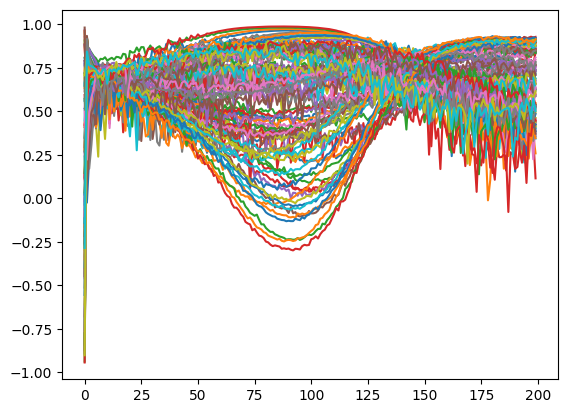

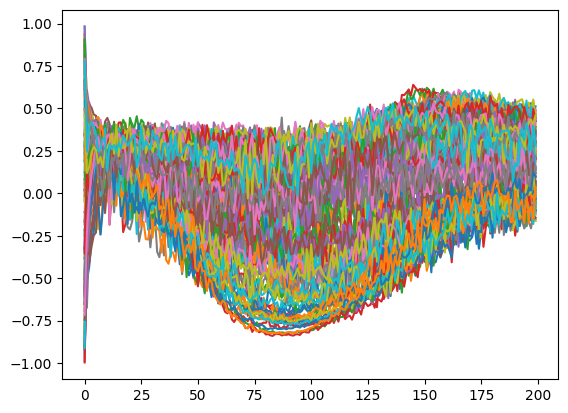

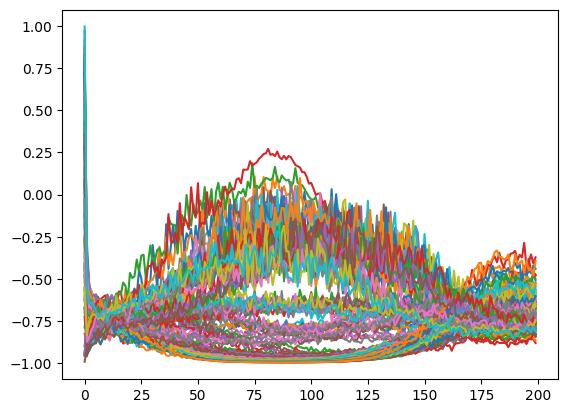

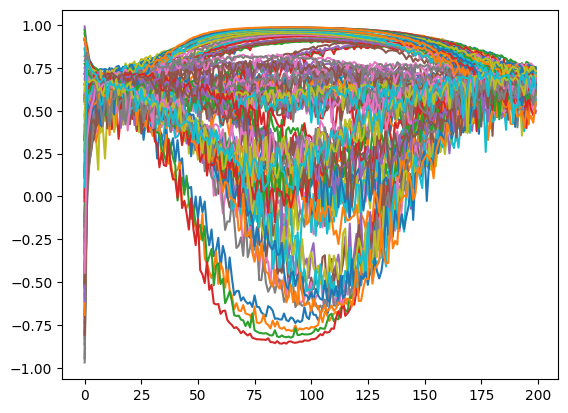

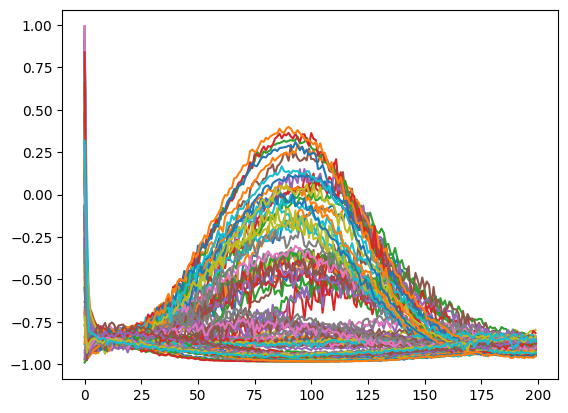

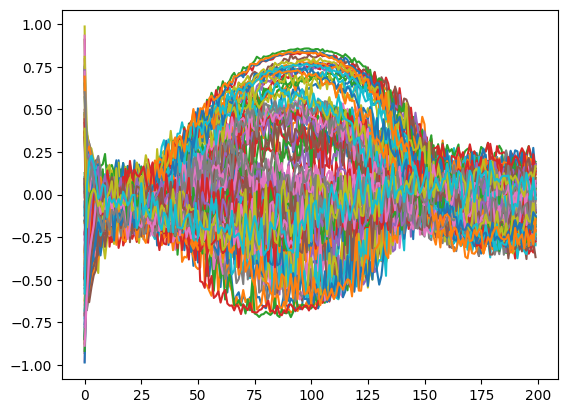

In [23]:
for dim in range(6):
    for i in range(100):
        plt.plot(train_dataset._states[i, :, dim])
    plt.show()

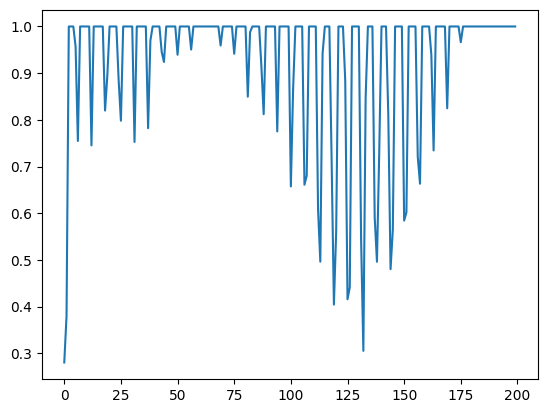

In [ ]:
plt.plot(train_dataset._states[0, :, 0])

In [26]:
val_loader = dataloaders["val"]

In [ ]:
mse = torch.nn.MSELoss()

with torch.no_grad():
    total_loss= torch.tensor(0, dtype=torch.float32, device=device)
    n = 0
    for item in val_loader:
        inputs: torch.Tensor = item["inputs"].to(device)
        targets: torch.Tensor = item["targets"]["state_decoded"].to(device)
        

        state = torch.rand((batch_size, seq_len, state_size), device=device)
        state = (2*state)-1

        state = torch.normal(
                                0.0, 0.4, (batch_size, seq_len, state_size), device=device)
        state = torch.clamp(state, -1, 1)

        sensorial_masks = None
        
        for i in range(seq_len):
            logits = model(state=state.clone(), sensorial_data=inputs, sensorial_masks=sensorial_masks)


            if i != seq_len-1:
                state[:, i+1] = logits["state"][:, i]

                state = torch.clamp(state, -1, 1)


        loss = mse(targets[:, :, 0], logits["state_decoded"][:, :, 0])
        total_loss += loss *targets.size(0)

        n += targets.size(0)

    total_loss = total_loss.item()
    total_loss /= n

total_loss

7.16586709022522e-05

In [29]:
train_info["toy1d_train_history"]["state_decoded_mse_first_val"][-1]

7.28987215552479e-05

Method|MSE
-|-
Parallel | 7.28987215552479e-05
Autoregressive| 7.16586709022522e-05

In [30]:
total_loss/train_info["toy1d_train_history"]["state_decoded_mse_first_val"][-1]

0.9829894046625234

In [32]:
t = torch.empty_like(train_loader.dataset._states, device="cpu")

In [33]:
t.element_size()*t.nelement()/1e6 #Mb

115.2